# Alternative projection

In [1]:
# Getting all the required library
# using JuMP
# using GLPK

using Plots
using LinearAlgebra
using Statistics

In [2]:
# Create the vander function for creating a form of representing the vectors and calculations
vander(t,n) = hcat([t.^i for i = 0:n-1]...)

vander (generic function with 1 method)

In [3]:
N = 10
c = rand(N)

10-element Array{Float64,1}:
 0.33206414725396494
 0.47132951637308595
 0.5248175732258622
 0.533329980436396
 0.41917156154344304
 0.7603814121386427
 0.15751322247319477
 0.955988458657586
 0.343428948373818
 0.30263118511576237

In [4]:
# Setting the parameters
T=0:0.1:3 # Interpolation points, note it has to be different from 0 so it's best to pick from 1
(n, m) = (3, 3) # The power of the 2 poly in the rational functions
# f(t) = sum([c[i]*sin(π*i*(t+0.25)) for i in 1:N]) # Function to approximate

# f(t) = (t^3+3)/(t^2 + 1) #function simple to test

f (generic function with 1 method)

In [100]:
# x = range(-2, stop=2, length=100)
# y = range(sqrt(2), stop=2, length=100)
r(x,y) = x*y*x - x^2 - y^3 + 3

r (generic function with 1 method)

In [120]:
rangeOfCheck_x = 0:0.2:10
rangeOfCheck_y = 0:0.2:10
szOfArr = size(rangeOfCheck_x)[1] * size(rangeOfCheck_y)[1]
x_coor = Array{Array{Float64}}(undef, 1, szOfArr)
y_coor = Array{Array{Float64}}(undef, 1, szOfArr)
z_coor = Array{Array{Float64}}(undef, 1, szOfArr)

count = 1

for a in rangeOfCheck_x
    for b in rangeOfCheck_y
        x_coor[count] = a
        y_coor[count] = b
        z_coor[count] = r(a,b)
        count = count + 1
    end
end

LoadError: MethodError: Cannot `convert` an object of type 
  Float64 to an object of type 
  Array{Float64,N} where N
Closest candidates are:
  convert(::Type{Array{T,N} where N}, !Matched::StaticArrays.SizedArray{S,T,N,M,Array{T,M}}) where {S, T, N, M} at C:\Users\Bob Kat\.julia\packages\StaticArrays\NTbHj\src\SizedArray.jl:111
  convert(::Type{Array{T,N} where N}, !Matched::StaticArrays.SizedArray{S,T,N,M,TData} where TData<:AbstractArray{T,M} where M where N) where {T, S} at C:\Users\Bob Kat\.julia\packages\StaticArrays\NTbHj\src\SizedArray.jl:108
  convert(::Type{T}, !Matched::AbstractArray) where T<:Array at array.jl:554
  ...

In [115]:
size(rangeOfCheck)

(51,)

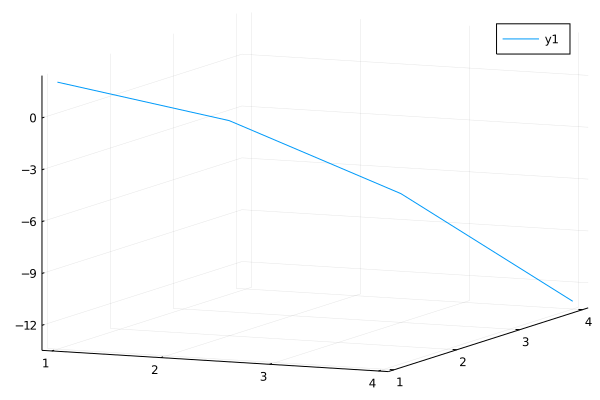

In [104]:
# plot the f to see
x = [1,2,3,4]
y = [1,2,3,4]
z = [r(1,1),r(2,2),r(3,3),r(4,4)]
plot3d(x, y, z,  markersize = 7)
# plot3d!(x, z, y,  markersize = 7)

In [102]:
# we are creating hyperplanes by thinking f(x) = p(x)/q(x)
# or converting to <A, xn> - f(x)<B, xm> = 0 with A, B is correspondingly coe of p(x) and q(x) and are the keys
# xn and xm are the vectors which will represent the fucntions
# for easy calculation combining A and B into a big vector so it would be: <A to B, xn to -f(x)xm> = 0
# this is a hyperplan formula with d = 0
# therefore, xn to -f(x)xm is the vector of the hyperplane in R n+m+2 space

# function to calculate the distince between a point and the hyperplane with the sign
function calculateDisAndPoint(big_vect, the_point)
#     calculate distance by |vect.start_point + d|/||vect|| , d is 0 in this case
    a = sum(hcat([the_point[i]*big_vect[i] for i in 1:size(big_vect)[2]]...))
    b = sum(hcat([big_vect[i]*big_vect[i] for i in 1:size(big_vect)[2]]...))
    c = sqrt(b)
    dis = a/c
#     calculate lambda in x - x0 = lambda.vect to calculate the projectpoint
    lambd = a/b
    x0 = the_point - (lambd * big_vect)
    return dis, x0
end

calculateDisAndPoint (generic function with 1 method)

In [406]:
# Calculate the big vector for each hyper plane
num_hy = size(T)[1]
hy_space_sz = n + m + 2
big_vect_Arr = Array{Array{Float64}}(undef, 1, num_hy)
for i in 1:num_hy
    xn = vander(T[i], n+1)
    xm = vander(T[i], m+1)
    big_vect_Arr[i] = hcat(xn, -f(T[i])*xm)
end

In [421]:
# iterate after a certain times and store the value in a array of the size of number of hyperplanes
pointA = Array{Array{Float64}}(undef, 1, num_hy)

error_rate = 0.00000001

s_p = vander(1, hy_space_sz)
need_to_cal = true
count = 0

@time while true
    for i in 1:num_hy
        result = calculateDisAndPoint(big_vect_Arr[i],s_p)
        if isassigned(pointA, i)
            if need_to_cal
                a = pointA[i] - result[2]
                if sqrt(dot(a, a)) > error_rate
                    need_to_cal = false
                end
            end
        else
            need_to_cal = false
        end
        pointA[i] = result[2]
        s_p = result[2]
    end
    count += 1
    if need_to_cal
        break
    else
        need_to_cal = true
    end
end

println("the number of iteration: ", count)

663.669679 seconds (1.79 G allocations: 72.799 GiB, 5.17% gc time)
the number of iteration: 1983536


In [422]:
# calculate the mid point
mid_p = sum(pointA)/num_hy

1×8 Array{Float64,2}:
 1.49973  0.00332193  -0.00236001  …  0.000974325  0.499818  0.000166935

In [423]:
# we now have the final results
p(t) = sum((t^(i-1))*mid_p[i] for i in 1:(n+1))
q(t) = sum((t^(i-1))*mid_p[i+n+1] for i in 1:(m+1))
g(t) = p(t)/q(t)

g (generic function with 1 method)

In [424]:
# Find the points of extreme deviation:
# T = 1.1:0.1:2
σ(t) = g(t) - f(t)
Tmax = maximum(abs.(σ.(T)))
T⁺ = T[findall(t -> σ(t) ≈ Tmax, T)]
T⁻ = T[findall(t -> σ(t) ≈ -Tmax, T)]

1-element Array{Float64,1}:
 0.0

In [425]:
# calculate the mean in the range
mean(σ.(T))

1.3737062713011533e-6

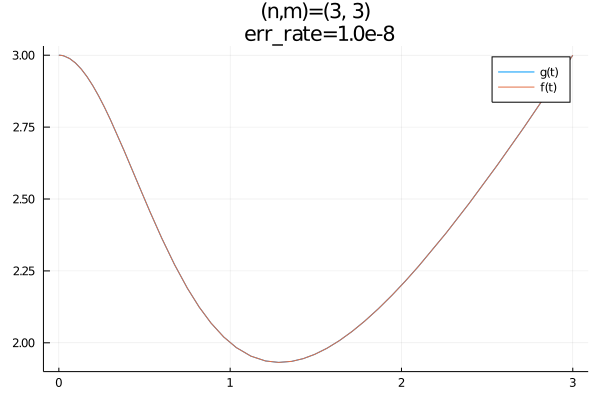

In [426]:
plot(g,0,3, title="(n,m)=$((n,m))\n err_rate=$(error_rate)", label="g(t)")
plot!(f,0,3, label="f(t)")

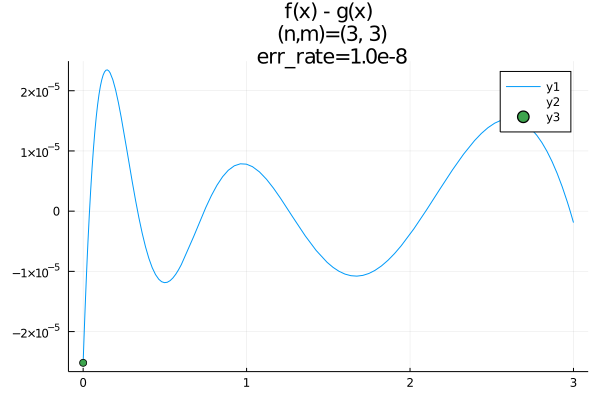

In [427]:
plot(σ,0,3, title="f(x) - g(x)\n (n,m)=$((n,m))\n err_rate=$(error_rate)")
scatter!(T⁺,σ.(T⁺))
scatter!(T⁻,σ.(T⁻))

# Issues can report on:
- the number of planes and the range to approximate, how many planes is enough and at what range?
- the power of the 2 poly in rational (n and m), higher mean better ? but will that affect the computation
- the number of iteration/computation time corresponding to the error rate, what is the acceptable error rate?
- is calculating the mid point by the avg the best way?
- the case of going to infinity (maybe not that interesting)

## Parameters need to be set/change:
- n and m
- range of approx [a,b]
- step in that range to determine number of hyperplanes
- error rate

Runtime of the algo should be: O(h(n+m+2)) for each iteration

testing, checking by:
- the accuracy (maybe the standard deviation)
- the computation time or iteration
- 


In [26]:
@elapse println("23323")

@elapse 23
